### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

## 1. Importing the dataset

In [9]:
df = pd.read_csv('C:/mlproject/notebook/data/StudentsPerformance.csv')

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.shape

(1000, 8)

## 2. Data checks to perform

1. check missing values
2. check duplicates
3. check data type
4. check no of unique values in each column
5. check statistics of dataset
6. check various categories present in the different categorical column

### 2.1 checking missing values

In [12]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Observation: There is no missing values in the dataset

### 2.2 Check Duplicates

In [14]:
df.duplicated().sum()

np.int64(0)

There are no duplicate values

### 2.3 Check Data Type

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


6 objects and 3 integer columns

### 2.4 Checking number of unique values of each column

In [16]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 2.5 Check statistics of Dataset

In [17]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Observation:
1. all means are very close to each other. (66 to 69.5)
2. all standard deviation are close. (14 to 16)
3. Data is fairly semetrical or little left (negatively) skewed as mean <= median. 

## 3. Exploring data

In [18]:
print("Categories in gender variable: ", end = " ")
print(df['gender'].unique())

print("Categories in race/ethnicity variable: ", end = " ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ", end = " ")
print(df['parental level of education'].unique())

print("Categories in lunch variable: ", end = " ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ", end = " ")
print(df['test preparation course'].unique())


Categories in gender variable:  ['female' 'male']
Categories in race/ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [21]:
#define numerical and categorical columns 
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('we have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('we have {} categorical features: {}'.format(len(categorical_features), categorical_features))

we have 3 numerical features: ['math score', 'reading score', 'writing score']
we have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Adding columns for "Total Score" and "Average"

In [22]:
df['total_score']= df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [25]:
writing_full = df[df['writing score'] == 100].shape[0]
reading_full = df[df['reading score'] == 100].shape[0]
maths_full = df[df['math score'] == 100].shape[0]

print("no. of student who got full in maths {}".format(maths_full))
print("no. of student who got full in reading {}".format(reading_full))
print("no. of student who got full in writing {}".format(writing_full))

no. of student who got full in maths 7
no. of student who got full in reading 17
no. of student who got full in writing 14


In [26]:
writing_less = df[df['writing score'] < 20].shape[0]
reading_less = df[df['reading score'] < 20].shape[0]
maths_less = df[df['math score'] < 20].shape[0]

print("no. of student who got less than 20 in maths {}".format(maths_less))
print("no. of student who got less than 20 in reading {}".format(reading_less))
print("no. of student who got less than 20 in writing {}".format(writing_less))

no. of student who got less than 20 in maths 4
no. of student who got less than 20 in reading 1
no. of student who got less than 20 in writing 3


Student performed worst in maths and best in reading 

## 4. Exploring Data (Visualization)

#### 4.1 Visualize average score distribution to make some conclusion

1. Histogram 
2. Kernel Distribution Function (KDE)

##### 4.1.1 Histogram & KDE

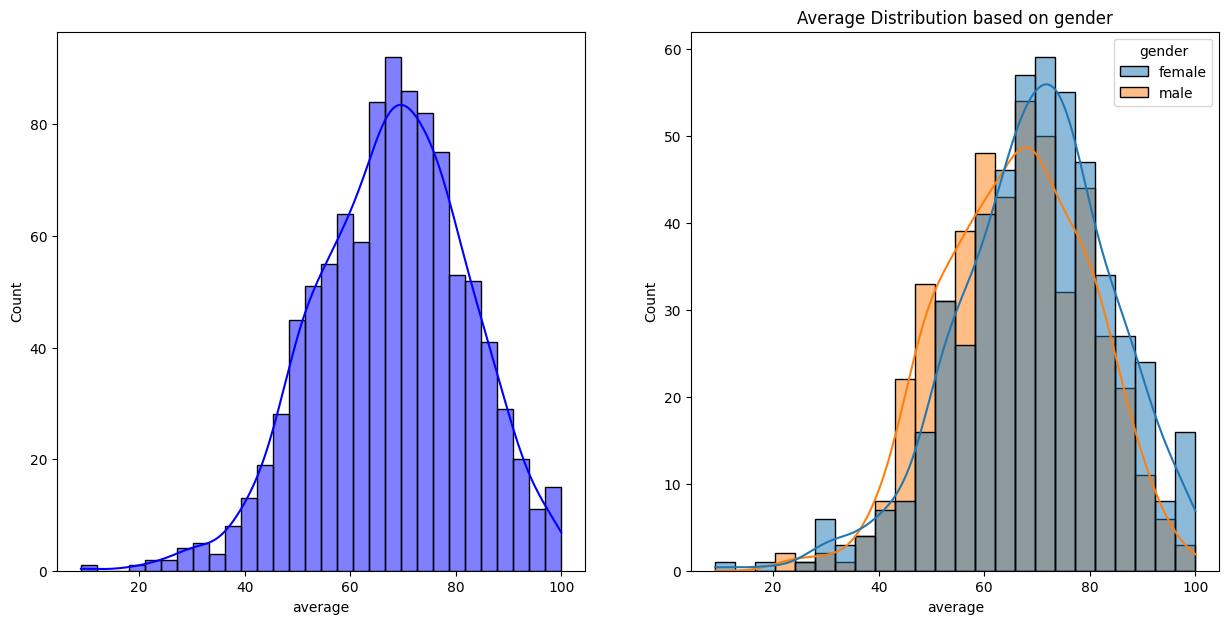

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
plt.title('Average marks Distribution based on gender')
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color = 'b')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

Observation: Female student tends to perform well than males

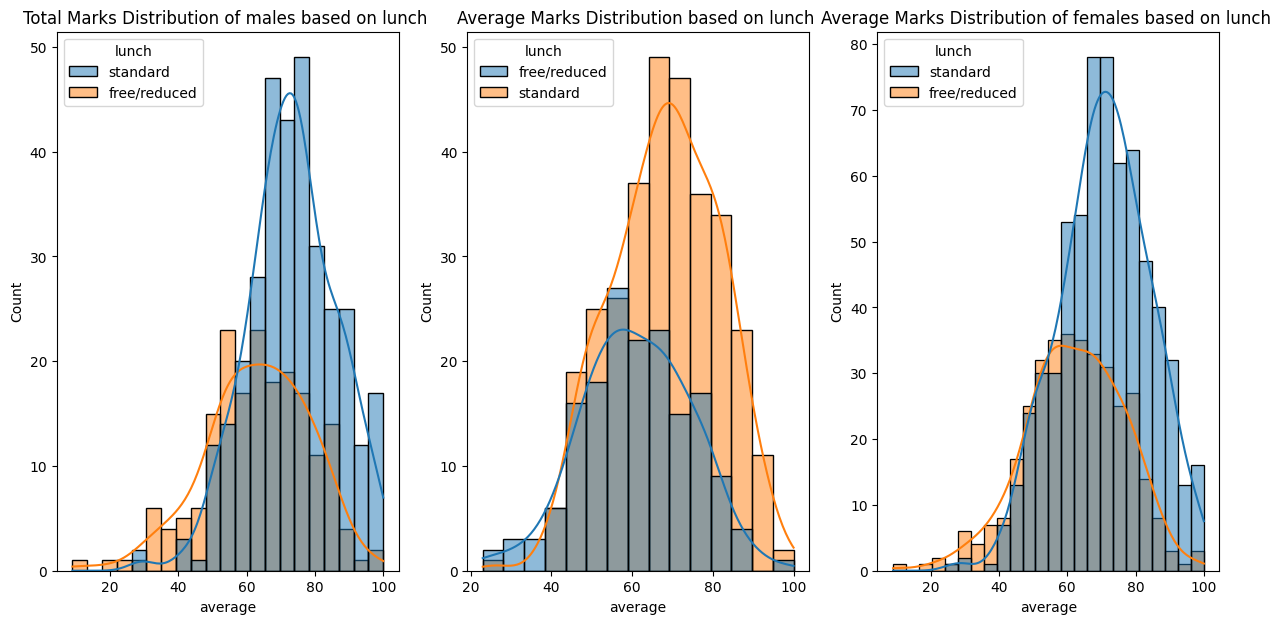

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(15,7))

plt.title('Average Marks Distribution of females based on lunch ')
plt.subplot(131)
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='lunch')


plt.title('Total Marks Distribution of males based on lunch ')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue='lunch')


plt.title('Average Marks Distribution based on lunch ')
plt.subplot(133)
sns.histplot(data=df, x='average', kde=True, hue='lunch')

plt.show()


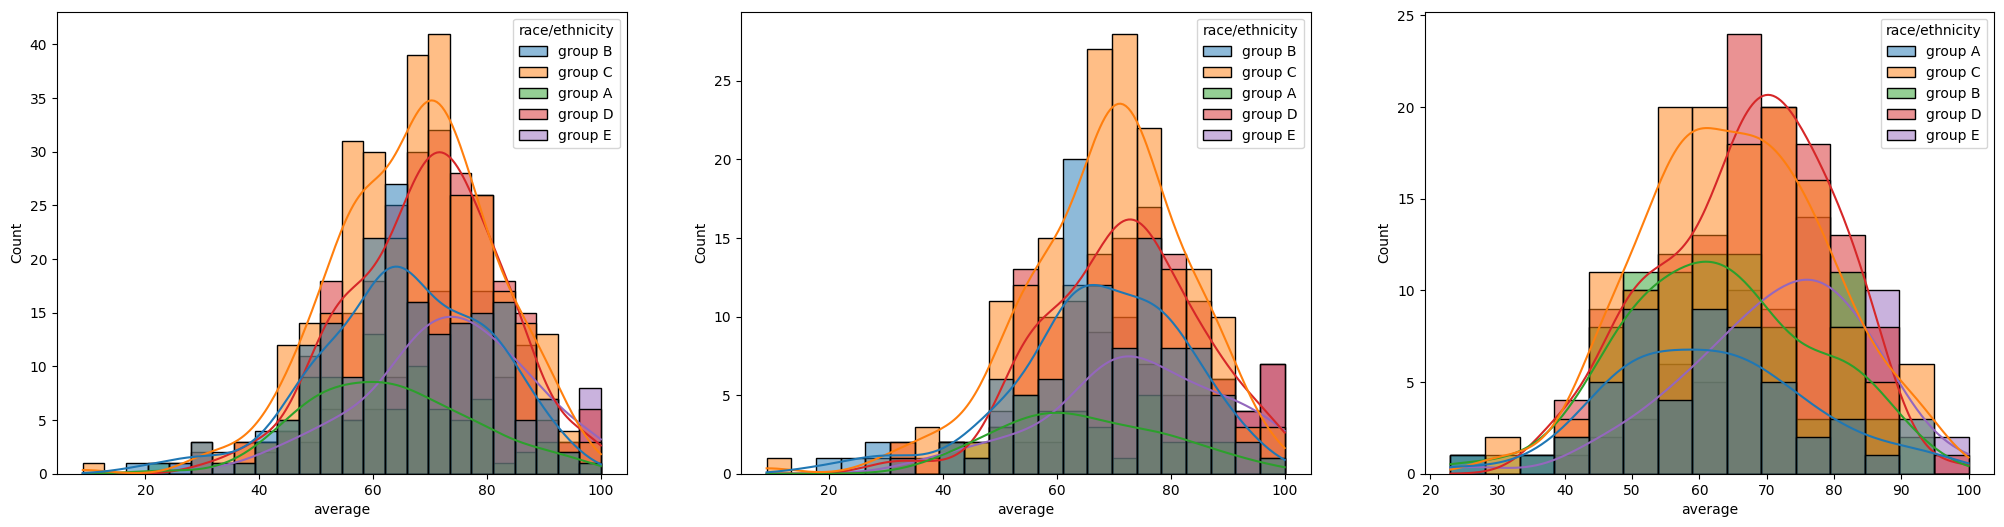

In [46]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()


    Students of group A and group B tends to perform poorly in exam.
    Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female


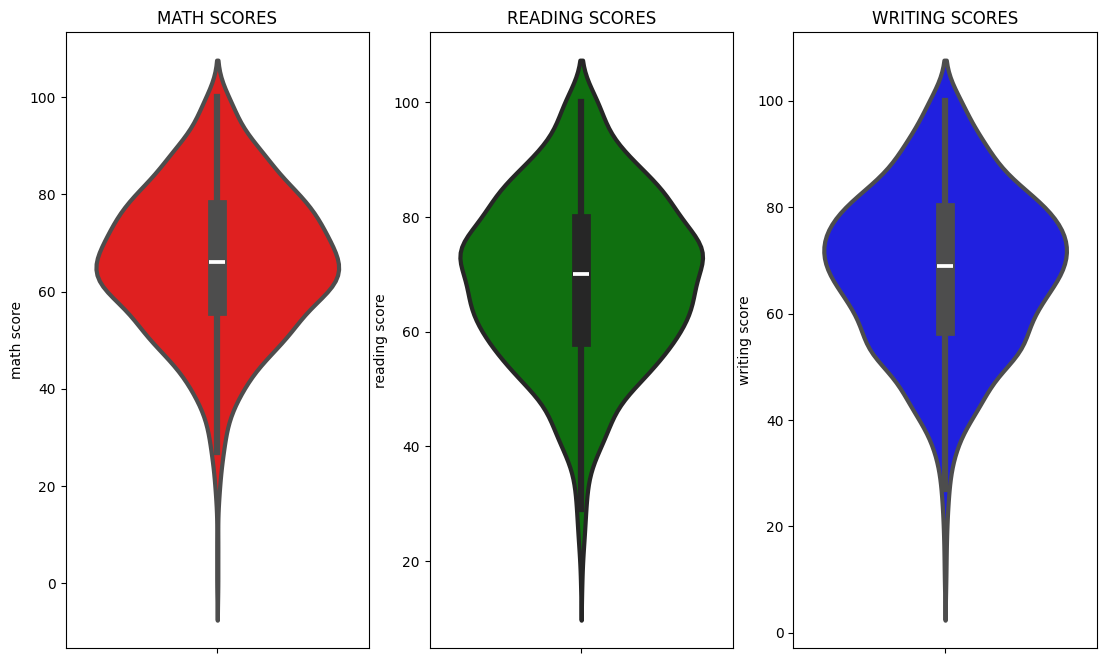

In [47]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

### Multivariate analysis using pieplot

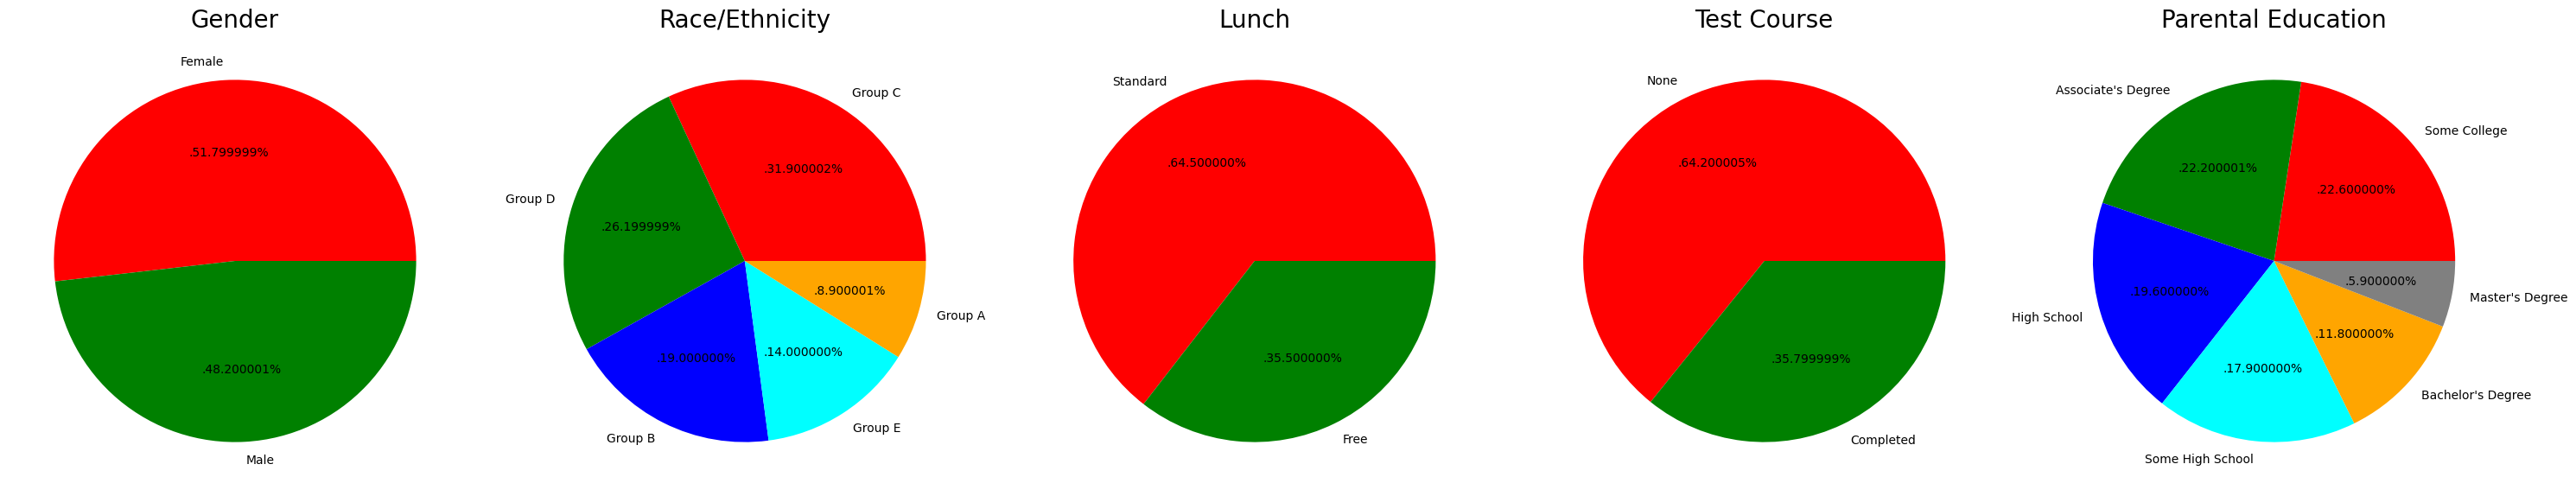

In [48]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


    Number of Male and Female students is almost equal
    Number students are greatest in Group C
    Number of students who have standard lunch are greater
    Number of students who have not enrolled in any test preparation course is greater
    Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"


### Feature Wise Visualization

### GENDER COLUMN


1. How is distribution of Gender ?
2. Is gender has any impact on student's performance ?


#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

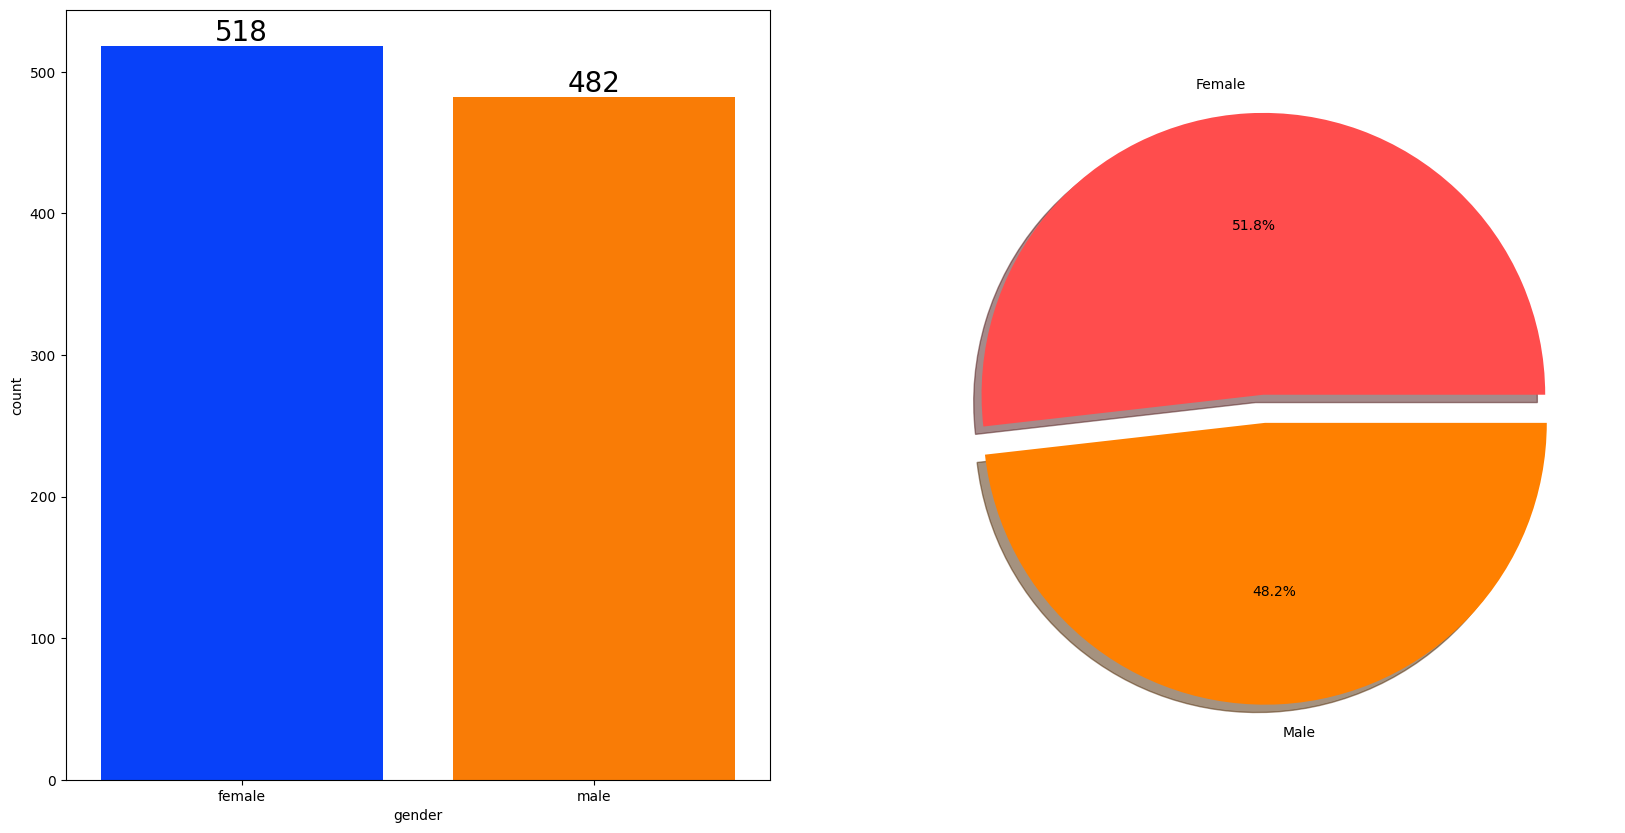

In [51]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Gender has balanced data with female students are 518 (52%) and male students are 482 (48%)

#### BIVARIATE ANALYSIS ( does gender has any impact on student's performance ? )

In [59]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


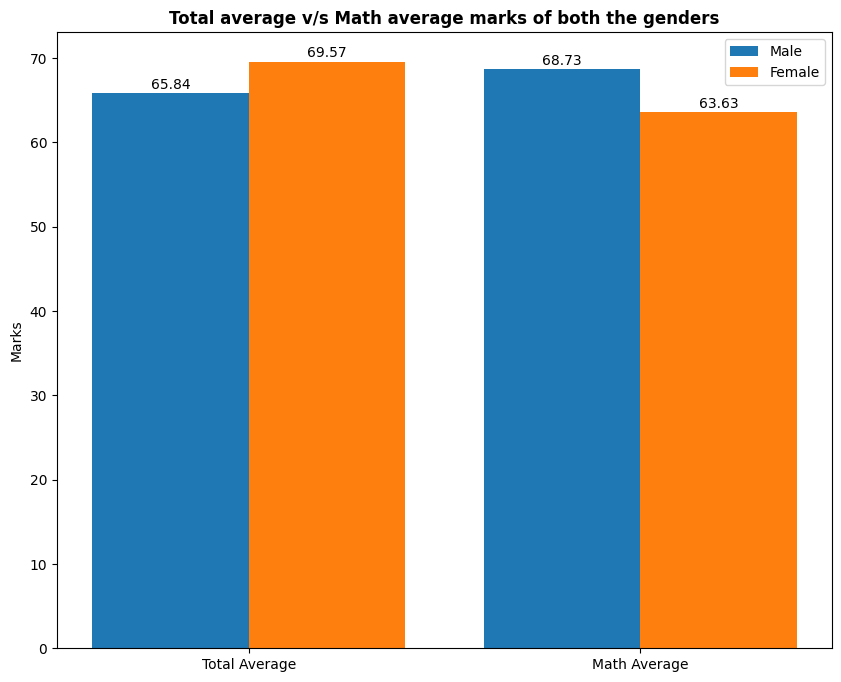

In [61]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()

for i in range(len(X)):
    plt.text(X_axis[i] - 0.2, male_scores[i] + 0.5, f'{male_scores[i]:.2f}', ha='center')
    plt.text(X_axis[i] + 0.2, female_scores[i] + 0.5, f'{female_scores[i]:.2f}', ha='center')


plt.show()

1. On an average females have a better overall score than men.
2. males have scored higher in Maths

#### 4.4.2 RACE/EHNICITY COLUMN


1. How is Group wise distribution ?
2. Does Race/Ehnicity has any impact on student's performance ?


#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

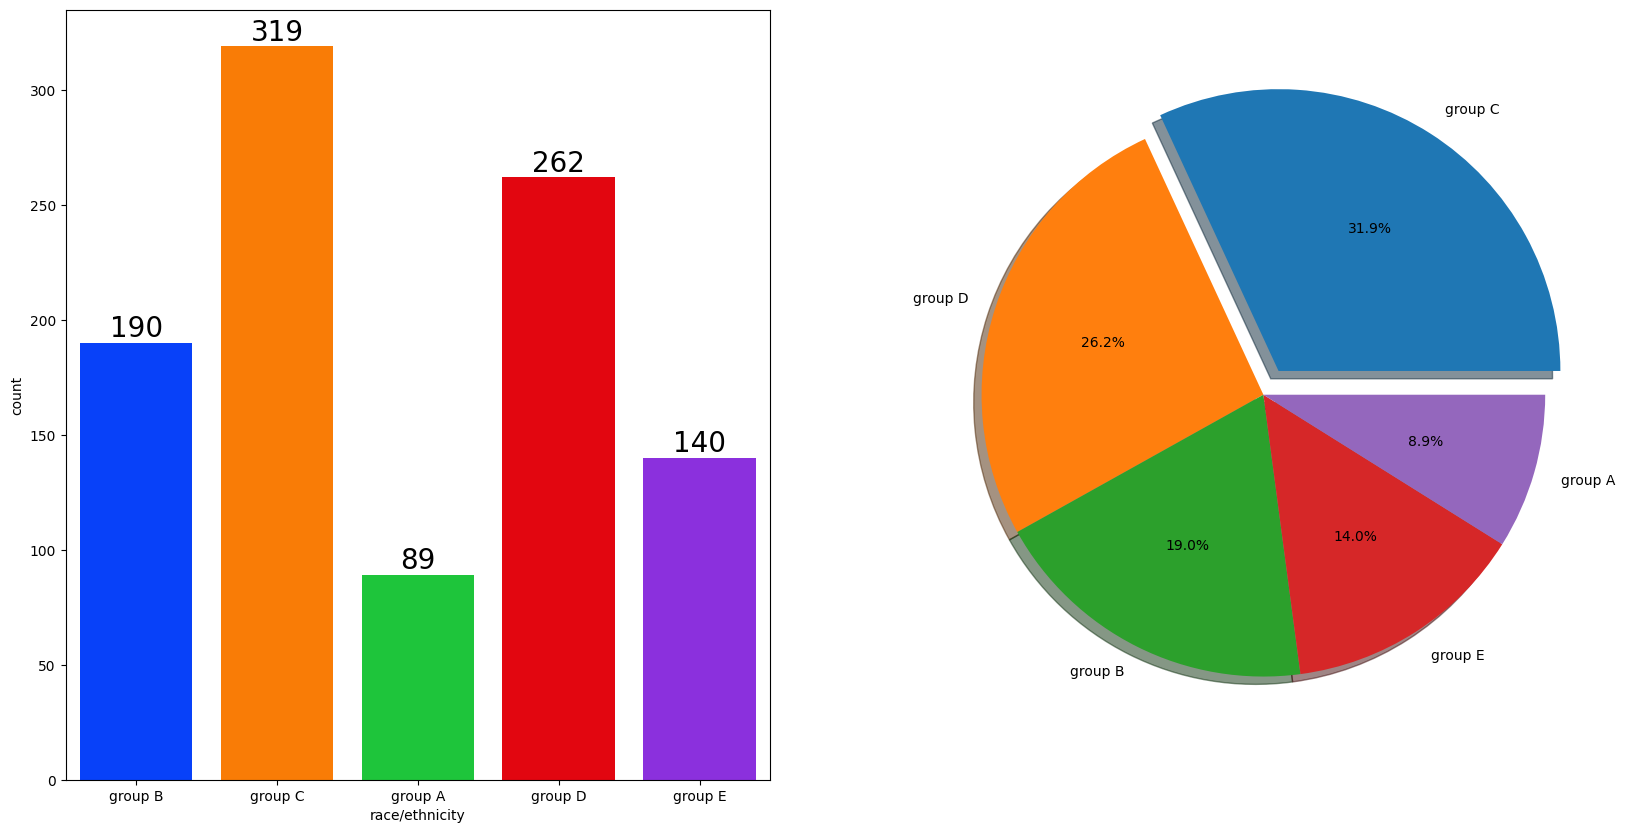

In [62]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 


1. Most of the student belonging from group C /group D.
2. Lowest number of students belong to groupA.


#### BIVARIATE ANALYSIS ( does Race/Ehnicity has any impact on student's performance ? )

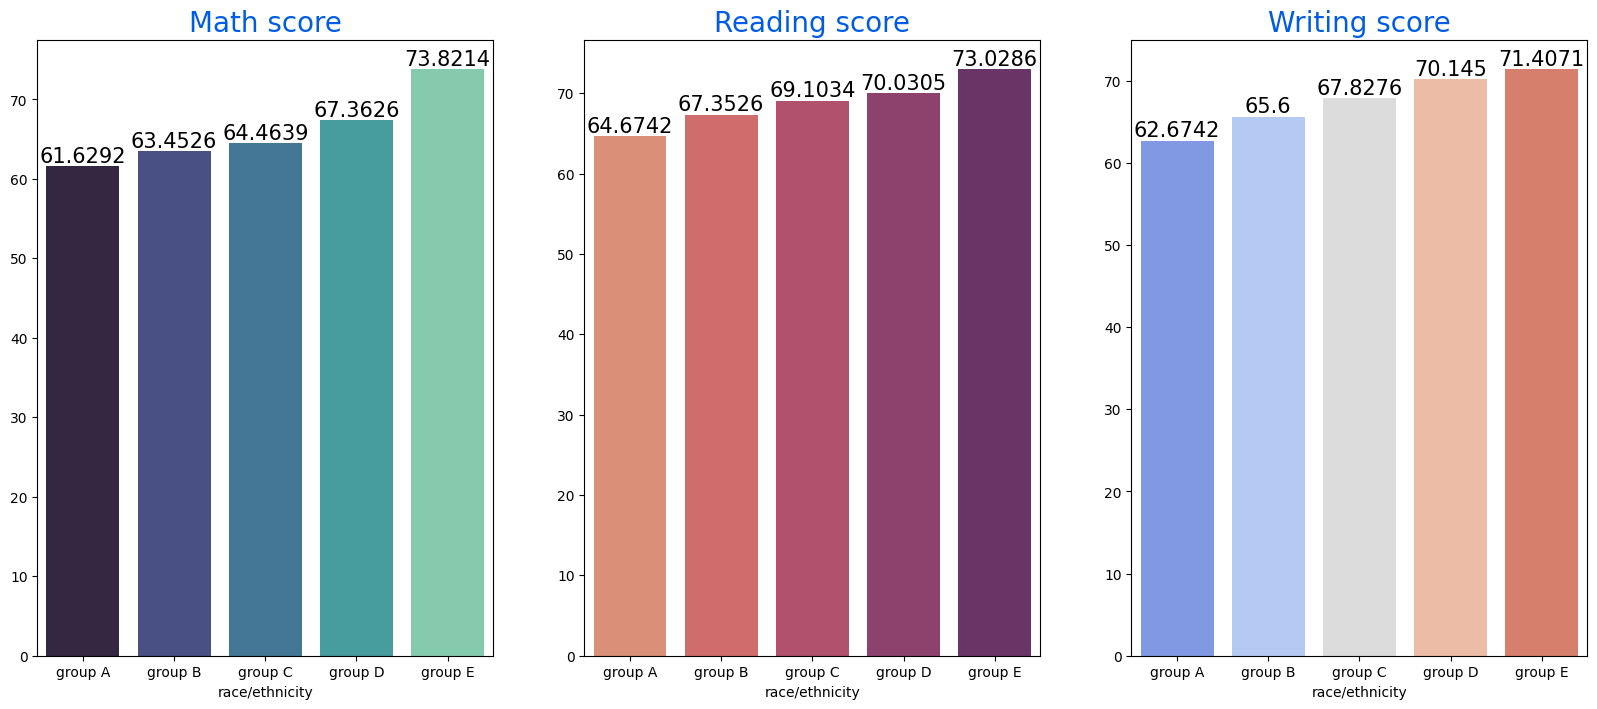

In [63]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)


1. Group E students have scored the highest marks.
2. Group A students have scored the lowest marks.
3. Students from a lower Socioeconomic status have a lower avg in all course subjects


#### 4.3 PARENTAL LEVEL OF EDUCATION COLUMN


1. What is educational background of student's parent ?
2. Is parental education has any impact on student's performance ?


#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

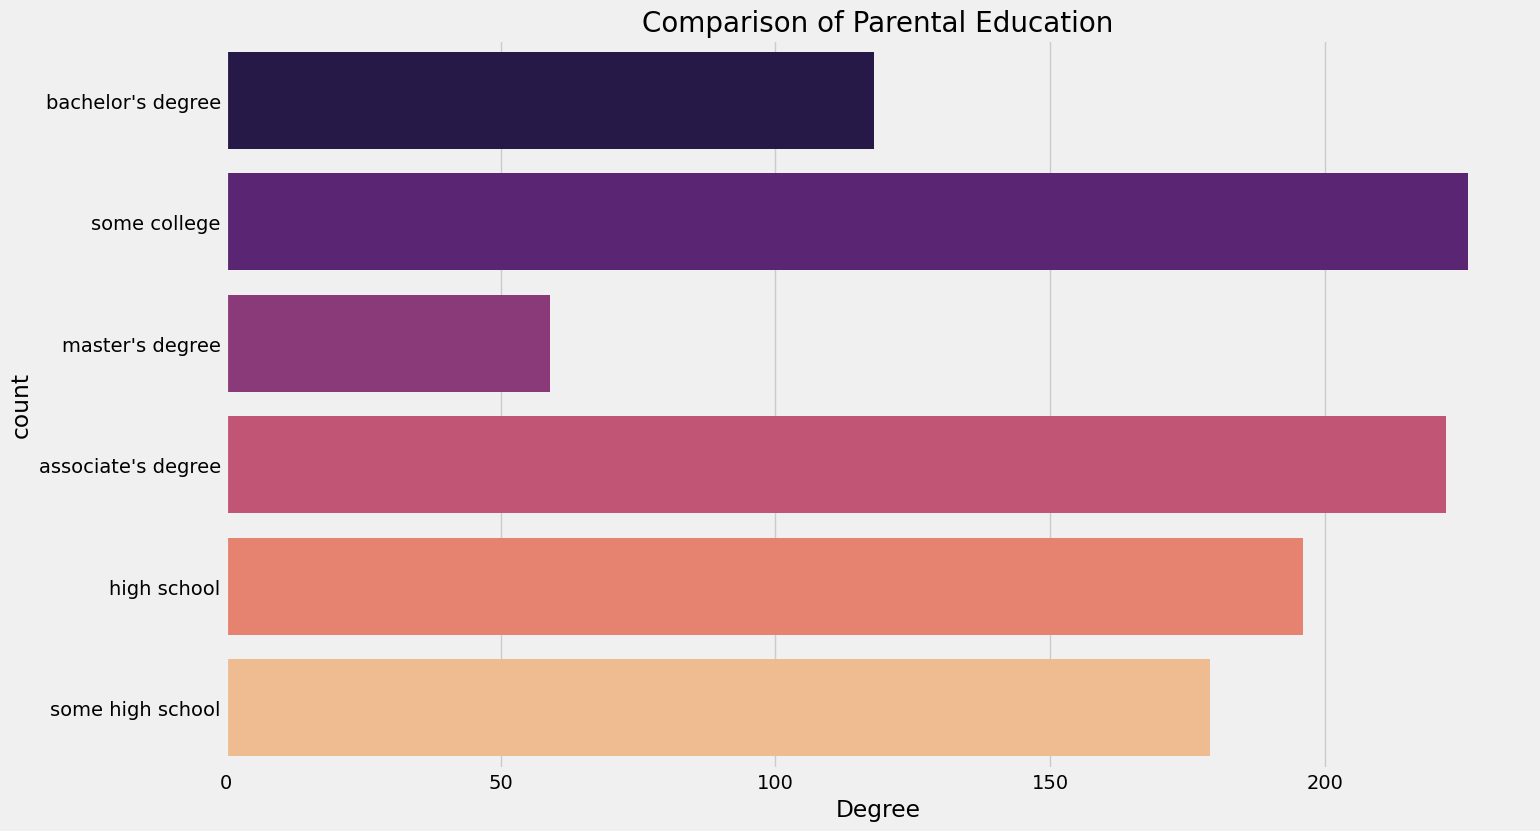

In [68]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'magma')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( does parental education has any impact on student's performance ? )

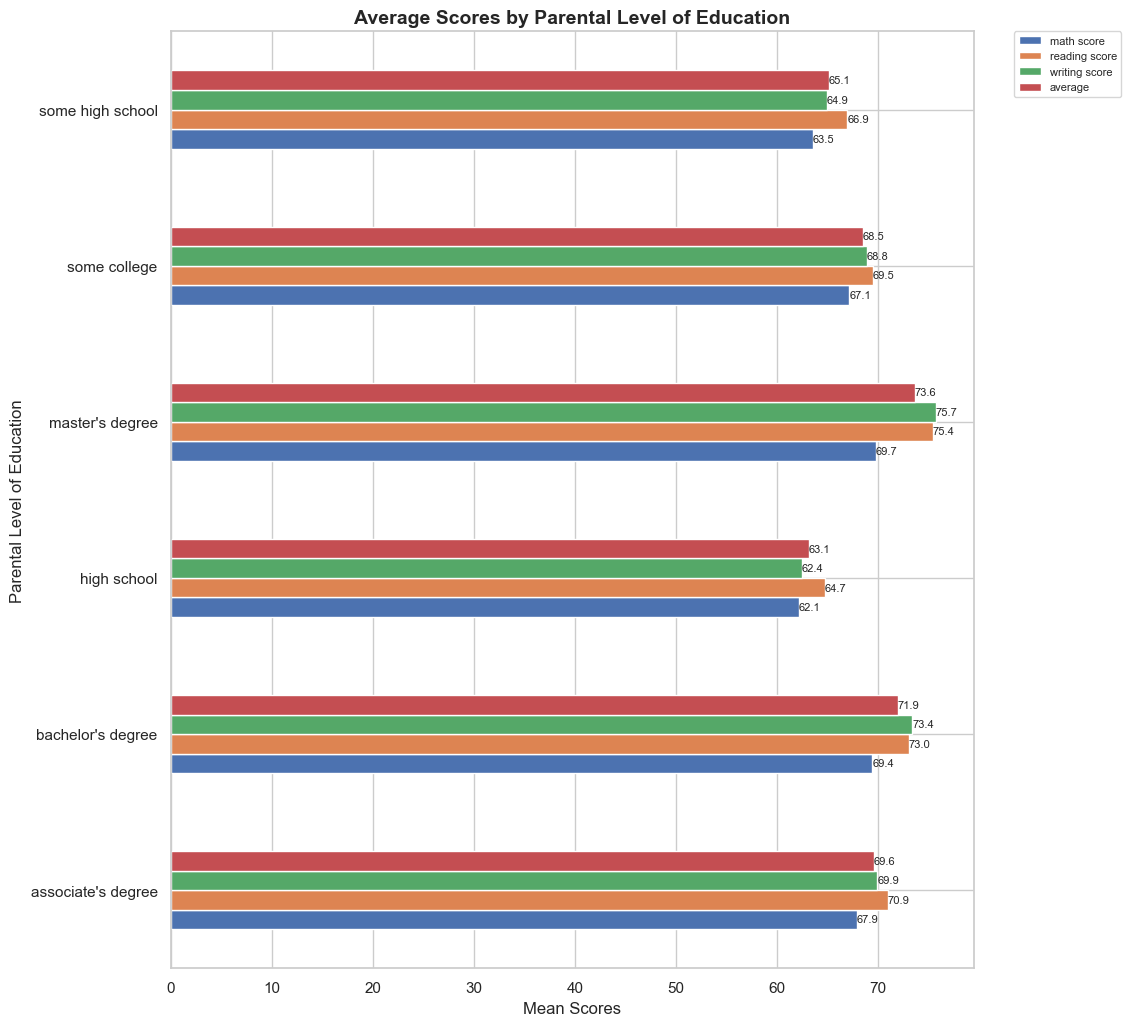

In [77]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = [col for col in numeric_columns if col != 'total_score']
grouped_data = df.groupby('parental level of education')[numeric_columns].agg('mean')

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 10))
grouped_data.plot(kind='barh', ax=ax)

# Loop over the bars and add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=8)

plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=8)

plt.title("Average Scores by Parental Level of Education", fontsize=14, fontweight='bold')
plt.xlabel("Mean Scores", fontsize=12)
plt.ylabel("Parental Level of Education", fontsize=12)

plt.show()


The score of student whose parents possess master and bachelor level education are higher than others.


####  LUNCH COLUMN


1. Which type of lunch is most common amoung students ?
2. What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

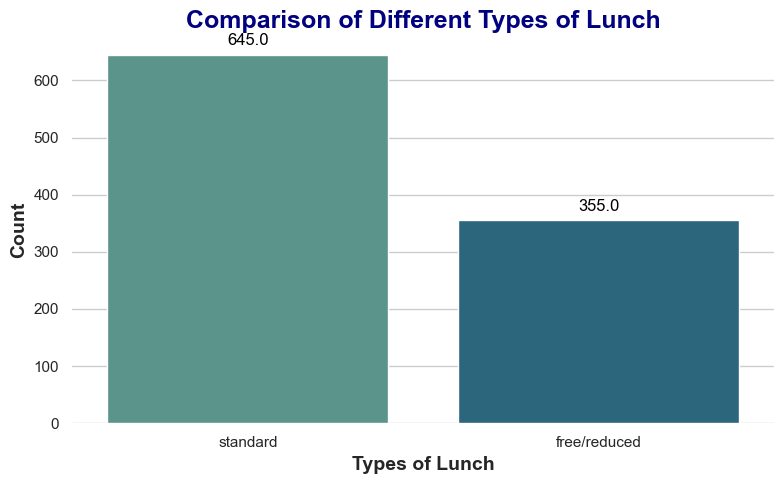

In [84]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)  

# Create the count plot with a palette
ax = sns.countplot(x='lunch', data=df, palette='crest')

# Adding labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=18, color='navy')
plt.xlabel('Types of Lunch', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Adjust the grid and remove any excess elements
sns.despine(left=True, bottom=True)

# Display the plot
plt.tight_layout()
plt.show()

Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

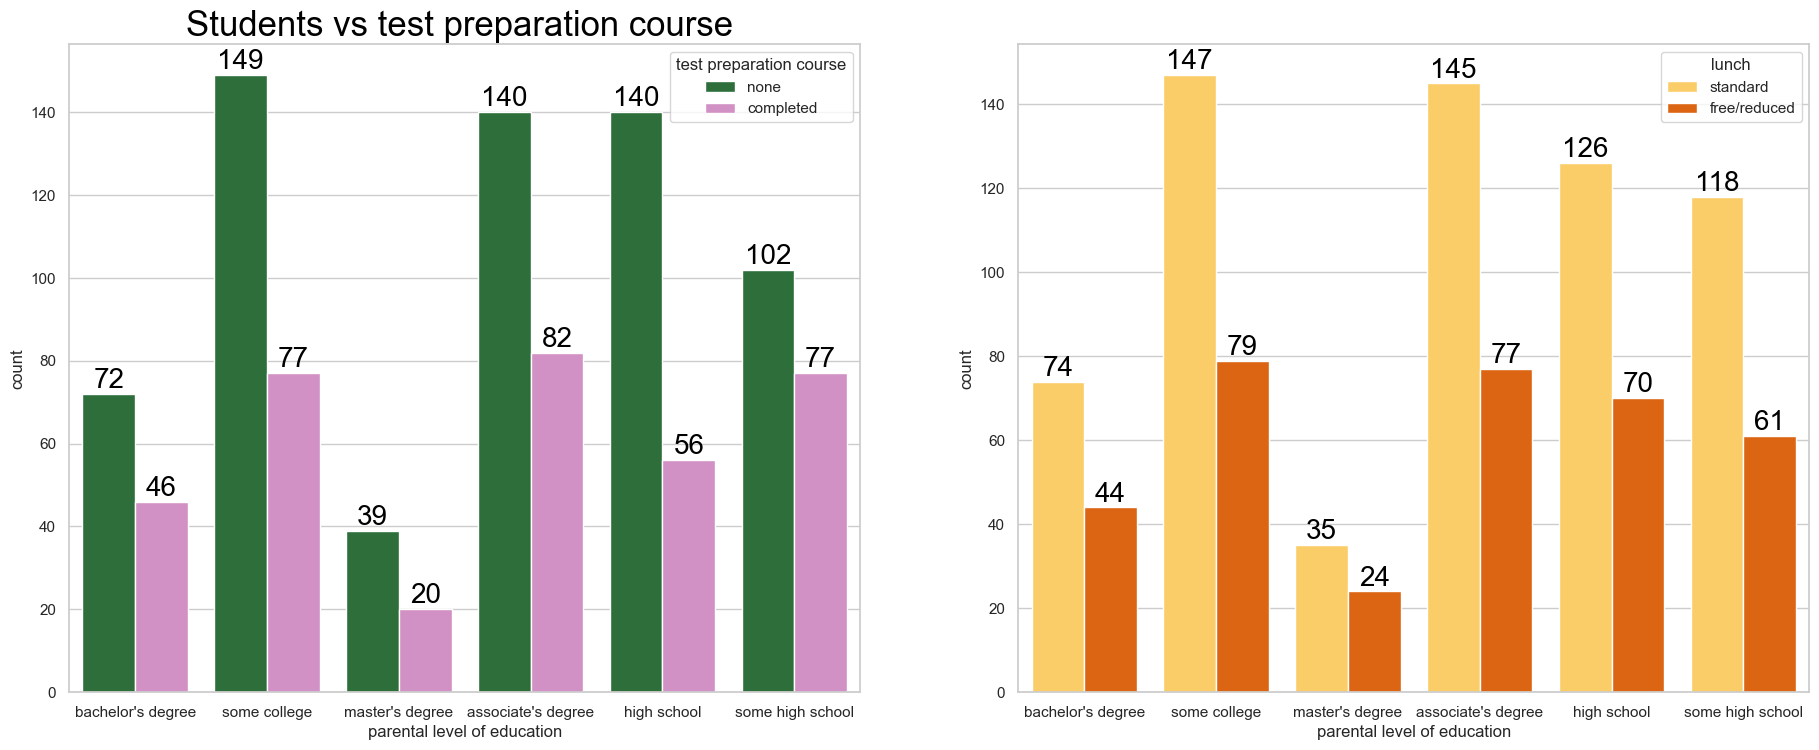

In [89]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'cubehelix',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'YlOrBr',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### TEST PREPARATION COURSE COLUMN

1. Which type of lunch is most common amoung students ?
2. Is Test prepration course has any impact on student's performance 

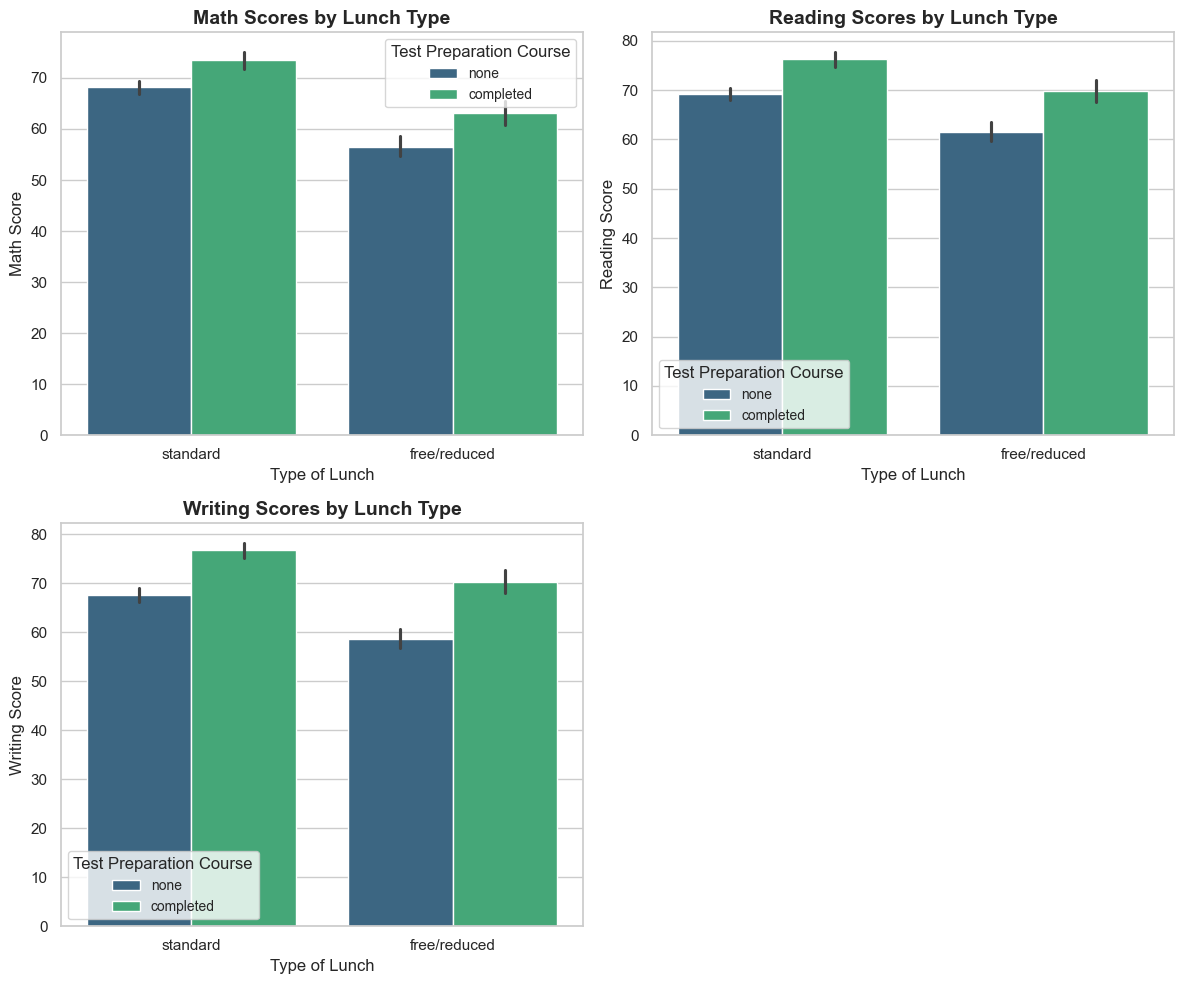

In [97]:

sns.set(style='whitegrid')

plt.figure(figsize=(12, 10))

# Subplot 1: Math Score
plt.subplot(2, 2, 1)
sns.barplot(x='lunch', y='math score', hue='test preparation course', data=df, palette='viridis')
plt.title('Math Scores by Lunch Type', fontsize=14, fontweight='bold')
plt.xlabel('Type of Lunch', fontsize=12)
plt.ylabel('Math Score', fontsize=12)
plt.legend(title='Test Preparation Course', fontsize=10)

# Subplot 2: Reading Score
plt.subplot(2, 2, 2)
sns.barplot(x='lunch', y='reading score', hue='test preparation course', data=df, palette='viridis')
plt.title('Reading Scores by Lunch Type', fontsize=14, fontweight='bold')
plt.xlabel('Type of Lunch', fontsize=12)
plt.ylabel('Reading Score', fontsize=12)
plt.legend(title='Test Preparation Course', fontsize=10)

# Subplot 3: Writing Score
plt.subplot(2, 2, 3)
sns.barplot(x='lunch', y='writing score', hue='test preparation course', data=df, palette='viridis')
plt.title('Writing Scores by Lunch Type', fontsize=14, fontweight='bold')
plt.xlabel('Type of Lunch', fontsize=12)
plt.ylabel('Writing Score', fontsize=12)
plt.legend(title='Test Preparation Course', fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### CHECKING OUTLIERS

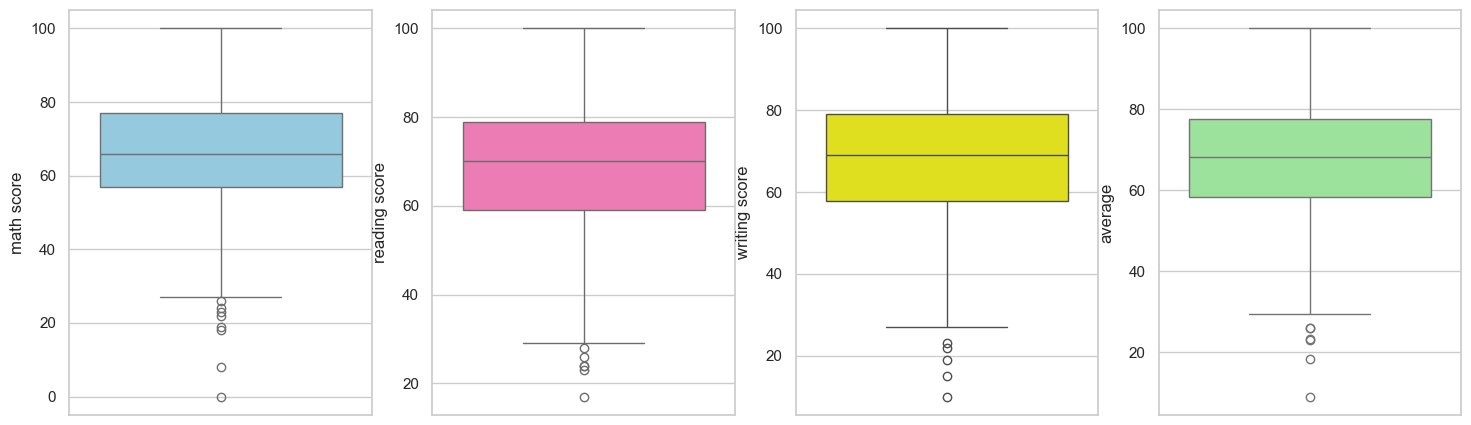

In [98]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### MUTIVARIATE ANALYSIS USING PAIRPLOT

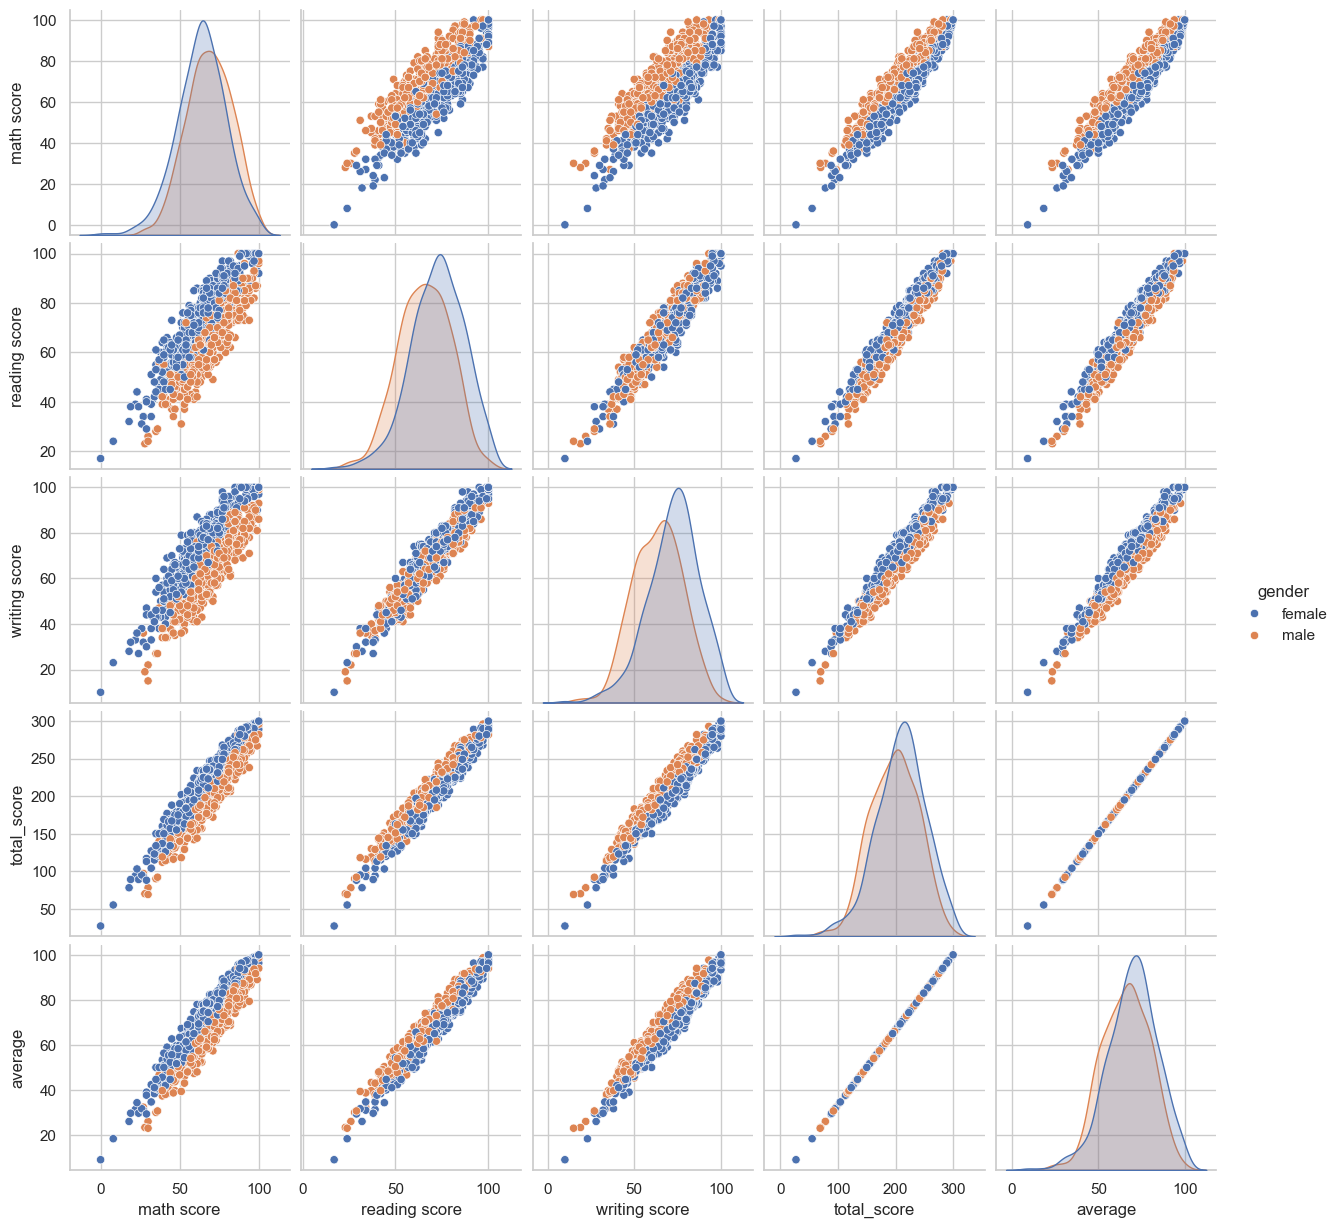

In [99]:
sns.pairplot(df,hue = 'gender')
plt.show()

observation: From the above plot it is clear that all the scores increase linearly with each other.

### Conclusions


1. Student's Performance is related with lunch, race, parental level education
2. Females lead in pass percentage and also are top-scorers
3. Student's Performance is not much related with test preparation course
4. Finishing preparation course is benefitial.
